<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Precipitation_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading some packages

In [3]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

!apt-get -qq install python-cartopy python3-cartopy
import cartopy
import cartopy.crs as ccrs

from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

     |████████████████████████████████| 4.3MB 5.8MB/s 
     |████████████████████████████████| 296kB 38.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (424 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 145378 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb .

# Load forecast
## 7th of august 2019 a major precipitation event occured in Bærum between kl 17 and 20

59.906419, 10.519678 Gjettum
59.921576, 10.585297 Nadderud
Around 4 km apart.




# Goal

The aim of this exercise is to investigate wether this event was properly captured (or how it was captured) by the forecast or not. 

In [17]:
year =  '2019'
day  =  '07' 
month = '08'
hour_1  ='00'

url = 'https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_subset_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
f = xr.open_dataset(url)

In [5]:
timestep_1=24
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'extemd'


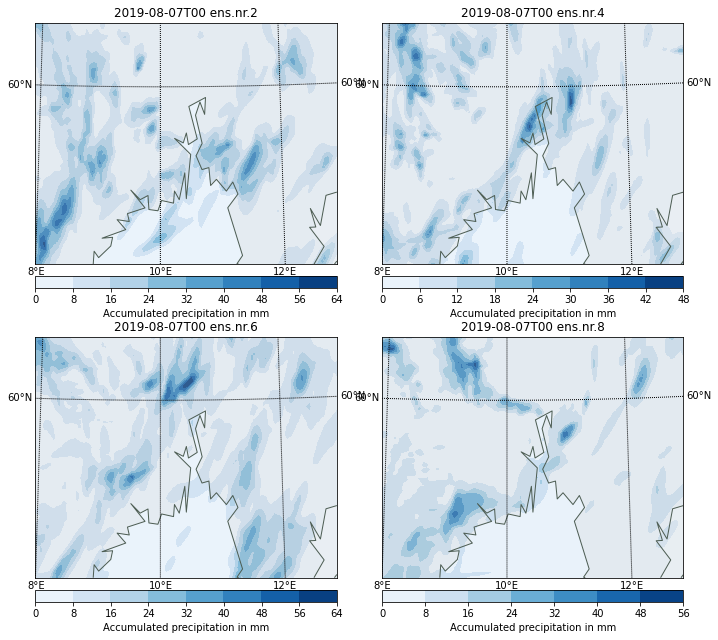

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
timestep_1=24
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.5, urcrnrlat=60.5, llcrnrlon=8.0, urcrnrlon=13.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( f.precipitation_amount_acc[timestep_1,mlevel,memb1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( f.precipitation_amount_acc[timestep_1,mlevel,memb2,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb2))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( f.precipitation_amount_acc[timestep_1,mlevel,memb3,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb3))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[3],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( f.precipitation_amount_acc[timestep_1,mlevel,memb4,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb4))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

In [ ]:
f

<xarray.Dataset>
Dimensions:                                                         (atmosphere_as_single_layer: 1, ensemble_member: 10, height0: 1, height1: 1, height3: 1, height_above_msl: 1, hybrid: 5, hybrid0: 1, hybrid2: 5, pressure: 5, time: 67, x: 889, y: 949)
Coordinates:
  * ensemble_member                                                 (ensemble_member) int16 0 ... 9
  * height0                                                         (height0) float32 0.0
  * hybrid2                                                         (hybrid2) float64 0.9862 ... 0.9985
  * pressure                                                        (pressure) float32 500.0 ... 1000.0
  * time                                                            (time) datetime64[ns] 2019-08-06 ... 2019-08-08T18:00:00
  * x                                                               (x) float32 -1022485.4 ... 1197514.6
  * y                                                               (y) float32 -1129330.6 ... 1240669.4
  * atmosphere_as_single_layer                                      (atmosphere_as_single_layer) int16 0
  * hybrid                                                          (hybrid) float64 0.9862 ... 0.9985
  * height1                                                         (height1) float32 2.0
  * height3                                                         (height3) float32 10.0
  * height_above_msl                                                (height_above_msl) float32 0.0
  * hybrid0                                                         (hybrid0) float64 0.9985
    latitude                                                        (y, x) float64 51.85 ... 71.16
    longitude                                                       (y, x) float64 0.238 ... 49.61
Data variables:
    forecast_reference_time                                         datetime64[ns] 2019-08-06
    ap2                                                             (hybrid2) float64 0.3367 ... 0.0
    b2                                                              (hybrid2) float64 0.9862 ... 0.9985
    p02                                                             float64 1.013e+05
    projection_lambert                                              int32 -2147483647
    ap                                                              (hybrid) float64 0.3367 ... 0.0
    b                                                               (hybrid) float64 0.9862 ... 0.9985
    p0                                                              float64 1.013e+05
    ap0                                                             (hybrid0) float64 0.0
    b0                                                              (hybrid0) float64 0.9985
    p00                                                             float64 1.013e+05
    air_temperature_0m                                              (time, height0, ensemble_member, y, x) float32 ...
    atmosphere_boundary_layer_thickness                             (time, height0, ensemble_member, y, x) float32 ...
    downward_eastward_momentum_flux_in_air                          (time, height0, ensemble_member, y, x) float32 ...
    downward_northward_momentum_flux_in_air                         (time, height0, ensemble_member, y, x) float32 ...
    geopotential_ml                                                 (time, hybrid2, ensemble_member, y, x) float64 ...
    high_type_cloud_area_fraction                                   (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downward_sensible_heat_flux_wrt_time        (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downwelling_longwave_flux_in_air_wrt_time   (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time  (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_net_downward_shortwave_flux_wrt_time        (time, height0, ensemb

In [ ]:
f2 = xr.open_dataset(url).sel(x=0.238)#latitude=slice(54,72),longitude=slice(0,32))

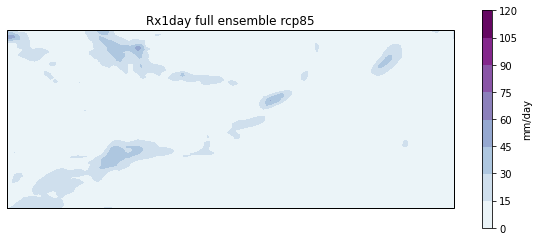

In [ ]:
import cartopy.crs as ccrs
'''
fig,ax = plt.subplots(subplot_kw = {'projection' : ccrs.PlateCarree()},figsize=(10,4))
ax.coastlines()
c = ax.contourf(rcp85_rx1day.lon,rcp85_rx1day.lat,rcp85_rx1day,cmap='BuPu',levels=np.arange(20,50,5))#,levels=np.arange(0,50))
ax.set_title('Rx1day full ensemble rcp85')
plt.colorbar(c,ax=ax,label='mm/day')
'''
noe = f.precipitation_amount_acc[timestep_1,mlevel,memb4,:,:]
#llcrnrlat= 58.5, urcrnrlat=60.5, llcrnrlon=8.0, urcrnrlon=13.0)
fig,ax = plt.subplots(subplot_kw = {'projection' : ccrs.PlateCarree()},figsize=(10,4))
#ax.coastlines()
c = ax.contourf(f.longitude,f.latitude,noe,cmap='BuPu')#,levels=np.arange(20,50,5))#,levels=np.arange(0,50))
ax.set_title('Rx1day full ensemble rcp85')
ax.set_xlim(8,13)
ax.set_ylim(58.5,60.5)
plt.colorbar(c,ax=ax,label='mm/day')


In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

# Ensemble mean

In [18]:
precip1 = f.precipitation_amount_acc.isel(time = timestep_1, height0 = 0)
precip_mean = precip1.mean(dim = 'ensemble_member')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: The following kwargs were not used by contour: 'extemd'


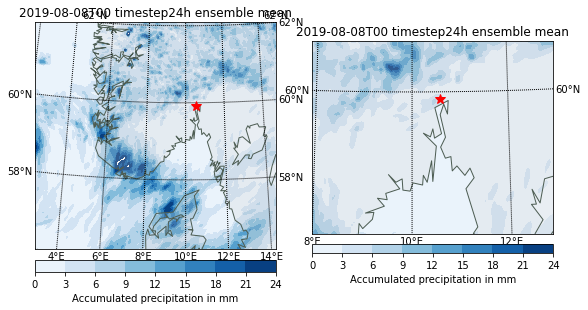

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8,6)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(1,2)
timestep_1 = 24
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)

ax = plt.subplot(gs[0],aspect='equal') 
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 56, urcrnrlat=62, llcrnrlon=3.0, urcrnrlon=15.0)

m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_mean[:,:]),cmap=plt.cm.Blues,extemd='max',levels=np.arange(0,25,3))

NYClat, NYClon = 59.914283, 10.530514 #bærum
xpt, ypt = m(NYClon, NYClat)
m.plot(xpt, ypt, 'c*',color='r', markersize=10)
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" timestep"+str(timestep_1)+"h ensemble mean")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm') 

#########
ax = plt.subplot(gs[1],aspect='equal') 
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.5, urcrnrlat=60.5, llcrnrlon=8.0, urcrnrlon=13.0)

m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_mean[:,:]),cmap=plt.cm.Blues,extemd='max',levels=np.arange(0,25,3))

NYClat, NYClon = 59.921576, 10.585297 #Nadderud, Bærum 
xpt, ypt = m(NYClon, NYClat)
m.plot(xpt, ypt, 'c*',color='r', markersize=10)
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" timestep"+str(timestep_1)+"h ensemble mean")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm') 


### Result:
As the plot above shows, mean ensemble 24h accumulated precipitation peakes at aroaund 24 mm is the Oslo-fjord area. For Bærum this value peakes at around 15-18 mm.

### Ensemble probability plot


In [ ]:
a = []; b = []; c = [];
for i in range(10):
  count = f.precipitation_amount_acc[24,mlevel,i,:,:]
  p10 = np.where(count>10,1,0)
  p20 = np.where(count>20,1,0)
  p30 = np.where(count>30,1,0)
  a.append(p10)
  b.append(p20)
  c.append(p30)
prob10 = sum(a)/10
prob20 = sum(b)/10
prob30 = sum(c)/10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'extemd'
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'extemd'


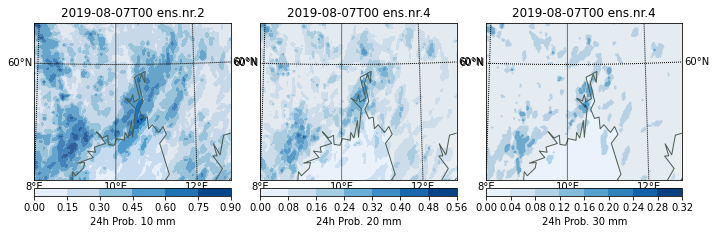

In [ ]:
fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(1,3)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.5, urcrnrlat=60.5, llcrnrlon=8.0, urcrnrlon=13.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(prob10),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24h Prob. 10 mm')      

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(prob20),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb2))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24h Prob. 20 mm') 

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(f.longitude),np.array(f.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(prob30),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(f.time[timestep_1],unit='h')+" ens.nr."+str(memb2))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24h Prob. 30 mm') 

### Single-site-selection

In [ ]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identic*l location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

# Point forecast Bærum

In [ ]:
[ix,jx] = findindex(f.latitude,f.longitude,59.921576, 10.585297) # Nadderud, Bærum
pr_bær = f.precipitation_amount_acc.isel(height0=0) 
pr_mean = pr_bær.mean(dim = 'ensemble_member')
pr_std = pr_bær.std(dim = 'ensemble_member')

Text(0, 0.5, 'accumulated mm timestep 24h')

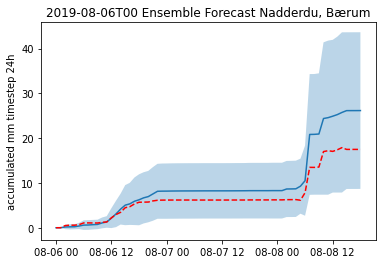

In [ ]:
plt.plot(f.time,pr_mean[:,ix,jx])
plt.fill_between(f.time,pr_mean[:,ix,jx]+
                 pr_std[:,ix,jx],pr_mean[:,ix,jx]-pr_std[:,ix,jx],
                 alpha=0.3)
plt.plot(f.time,pr_std[:,ix,jx],'--',color='red')
plt.title (np.datetime_as_string(f.time[int(hour_1)],unit='h')+" Ensemble Forecast Nadderdud, Bærum")
plt.ylabel("accumulated mm timestep "+str(timestep_1)+"h")

In [ ]:
[ix,jx] = findindex(f.latitude,f.longitude,59.906419, 10.519678) # Gjettum, Bærum
pr_bær = f.precipitation_amount_acc.isel(height0=0) 
pr_mean = pr_bær.mean(dim = 'ensemble_member')
pr_std = pr_bær.std(dim = 'ensemble_member')


Text(0, 0.5, 'accumulated mm timestep 24h')

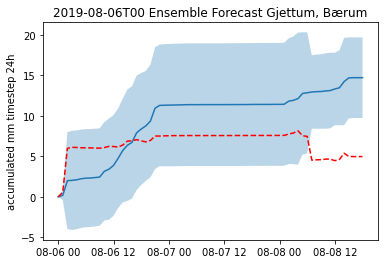

In [ ]:
plt.plot(f.time,pr_mean[:,ix,jx])
plt.fill_between(f.time,pr_mean[:,ix,jx]+
                 pr_std[:,ix,jx],pr_mean[:,ix,jx]-pr_std[:,ix,jx],
                 alpha=0.3)
plt.plot(f.time,pr_std[:,ix,jx],'--',color='red')
plt.title (np.datetime_as_string(f.time[int(hour_1)],unit='h')+" Ensemble Forecast Gjettum, Bærum")
plt.ylabel("accumulated mm timestep "+str(timestep_1)+"h")